In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Dense, Flatten, Reshape
from keras.datasets import mnist
from keras.models import Model

In [4]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [6]:
input_dim = 784 #28x28x1
latent_dim = 64

class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential([
            Flatten(),
            Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            Dense(input_dim, activation='sigmoid'),
            Reshape((28, 28))
        ])

    def call(self, input_data):
        encoded_data = self.encoder(input_data)
        encoded_data = self.decoder(encoded_data)
        return encoded_data

In [7]:
autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256,
                shuffle=True,validation_data=(x_test, x_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0953 - val_loss: 0.0333
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0301 - val_loss: 0.0216
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0204 - val_loss: 0.0157
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0150 - val_loss: 0.0121
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0116 - val_loss: 0.0095
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0093 - val_loss: 0.0078
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0077 - val_loss: 0.0067
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0067 - val_loss: 0.0059
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0055 - val_loss: 0.0050
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [8]:
encoded_imgs = autoencoder.encoder(x_test)
decoded_imgs = autoencoder.decoder(encoded_imgs)

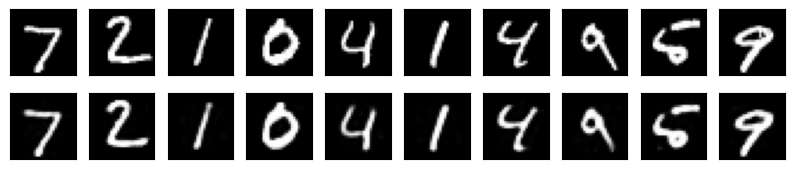

In [9]:
n = 10
plt.figure(figsize=(10,2))
for i in range(n):
    ax = plt.subplot(2, n, i + 1 )
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()